In [64]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve,roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [65]:
data=pd.read_csv('titanic_train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [66]:
df=pd.DataFrame(data=data)

In [67]:
from sklearn.preprocessing import LabelEncoder    
le=LabelEncoder()
list1=['Sex','Embarked']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

In [68]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,0


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int32
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null int32
dtypes: float64(2), int32(2), int64(5), object(3)
memory usage: 76.7+ KB


In [70]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

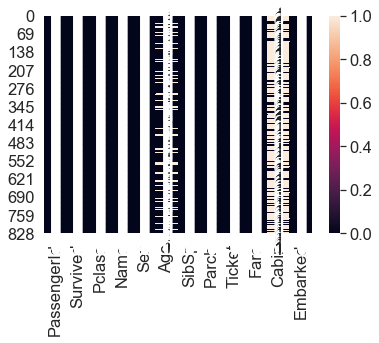

In [71]:
sns.heatmap(df.isnull(),annot=True)

In [72]:
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.036847,-0.057527,-0.001652,0.012658,0.013083
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.163517
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,0.157112
Sex,0.042939,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,0.104057
Age,0.036847,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,-0.025252
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,0.066654
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,0.038322
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,-0.221226
Embarked,0.013083,-0.163517,0.157112,0.104057,-0.025252,0.066654,0.038322,-0.221226,1.000000


In [73]:
df.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)

In [74]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,2
887,888,1,1,0,19.0,0,0,30.0000,2
888,889,0,3,0,NaN,1,2,23.4500,2
889,890,1,1,1,26.0,0,0,30.0000,0


In [75]:
from sklearn.preprocessing import Imputer
imputer=Imputer(missing_values='NaN',strategy='mean',axis=0)
imp=imputer.fit(df)
df_titanic=imp.fit_transform(df.values)
print(df_titanic)
df_new=pd.DataFrame(data=df_titanic,columns=df.columns)
df_new

[[  1.       0.       3.     ...   0.       7.25     2.    ]
 [  2.       1.       1.     ...   0.      71.2833   0.    ]
 [  3.       1.       3.     ...   0.       7.925    2.    ]
 ...
 [889.       0.       3.     ...   2.      23.45     2.    ]
 [890.       1.       1.     ...   0.      30.       0.    ]
 [891.       0.       3.     ...   0.       7.75     1.    ]]


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,0.0,3.0,1.0,22.000000,1.0,0.0,7.2500,2.0
1,2.0,1.0,1.0,0.0,38.000000,1.0,0.0,71.2833,0.0
2,3.0,1.0,3.0,0.0,26.000000,0.0,0.0,7.9250,2.0
3,4.0,1.0,1.0,0.0,35.000000,1.0,0.0,53.1000,2.0
4,5.0,0.0,3.0,1.0,35.000000,0.0,0.0,8.0500,2.0
...,...,...,...,...,...,...,...,...,...
886,887.0,0.0,2.0,1.0,27.000000,0.0,0.0,13.0000,2.0
887,888.0,1.0,1.0,0.0,19.000000,0.0,0.0,30.0000,2.0
888,889.0,0.0,3.0,0.0,29.699118,1.0,2.0,23.4500,2.0
889,890.0,1.0,1.0,1.0,26.000000,0.0,0.0,30.0000,0.0


In [76]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null float64
Survived       891 non-null float64
Pclass         891 non-null float64
Sex            891 non-null float64
Age            891 non-null float64
SibSp          891 non-null float64
Parch          891 non-null float64
Fare           891 non-null float64
Embarked       891 non-null float64
dtypes: float64(9)
memory usage: 62.8 KB


In [77]:
df_new.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,1.538721
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.794231
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,2.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000


In [78]:
df_new.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Sex           -0.618921
Age            0.434488
SibSp          3.695352
Parch          2.749117
Fare           4.787317
Embarked      -1.246689
dtype: float64

In [79]:
for i in df_new.columns:
    if df_new.skew().loc[i]>0.55:
        df_new[i]=np.log1p(df_new[i])

In [80]:
df_new.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Sex           -0.618921
Age            0.434488
SibSp          1.661245
Parch          1.675439
Fare           0.394928
Embarked      -1.246689
dtype: float64

In [129]:
from scipy.stats import zscore
z=np.abs(zscore(df_new))
print(df_new.shape)
df_titanic=df_new.loc[(z<3).all(axis=1)]
print(df_titanic.shape)

(891, 9)
(844, 9)


In [130]:
for i in df_titanic.columns:
    if df_titanic.skew().loc[i]>0.55:
        df_titanic[i]=np.log1p(df_titanic[i])

In [131]:
df_titanic.skew()

PassengerId    0.008182
Survived       0.417061
Pclass        -0.631176
Sex           -0.594266
Age            0.275362
SibSp          1.097903
Parch          1.478642
Fare           0.642638
Embarked      -1.208124
dtype: float64

PassengerId       AxesSubplot(0.125,0.536818;0.110714x0.343182)
Survived       AxesSubplot(0.257857,0.536818;0.110714x0.343182)
Pclass         AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Sex            AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Age            AxesSubplot(0.656429,0.536818;0.110714x0.343182)
SibSp          AxesSubplot(0.789286,0.536818;0.110714x0.343182)
Parch                AxesSubplot(0.125,0.125;0.110714x0.343182)
Fare              AxesSubplot(0.257857,0.125;0.110714x0.343182)
Embarked          AxesSubplot(0.390714,0.125;0.110714x0.343182)
dtype: object

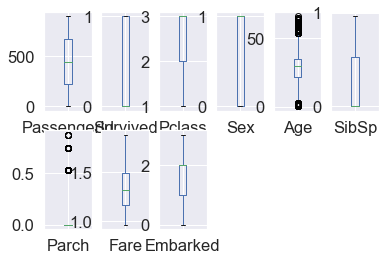

In [132]:
df_titanic.plot(kind='box',subplots=True,layout=(2,6))

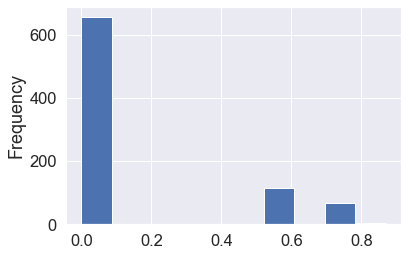

In [85]:
df_titanic['Parch'].plot.hist()

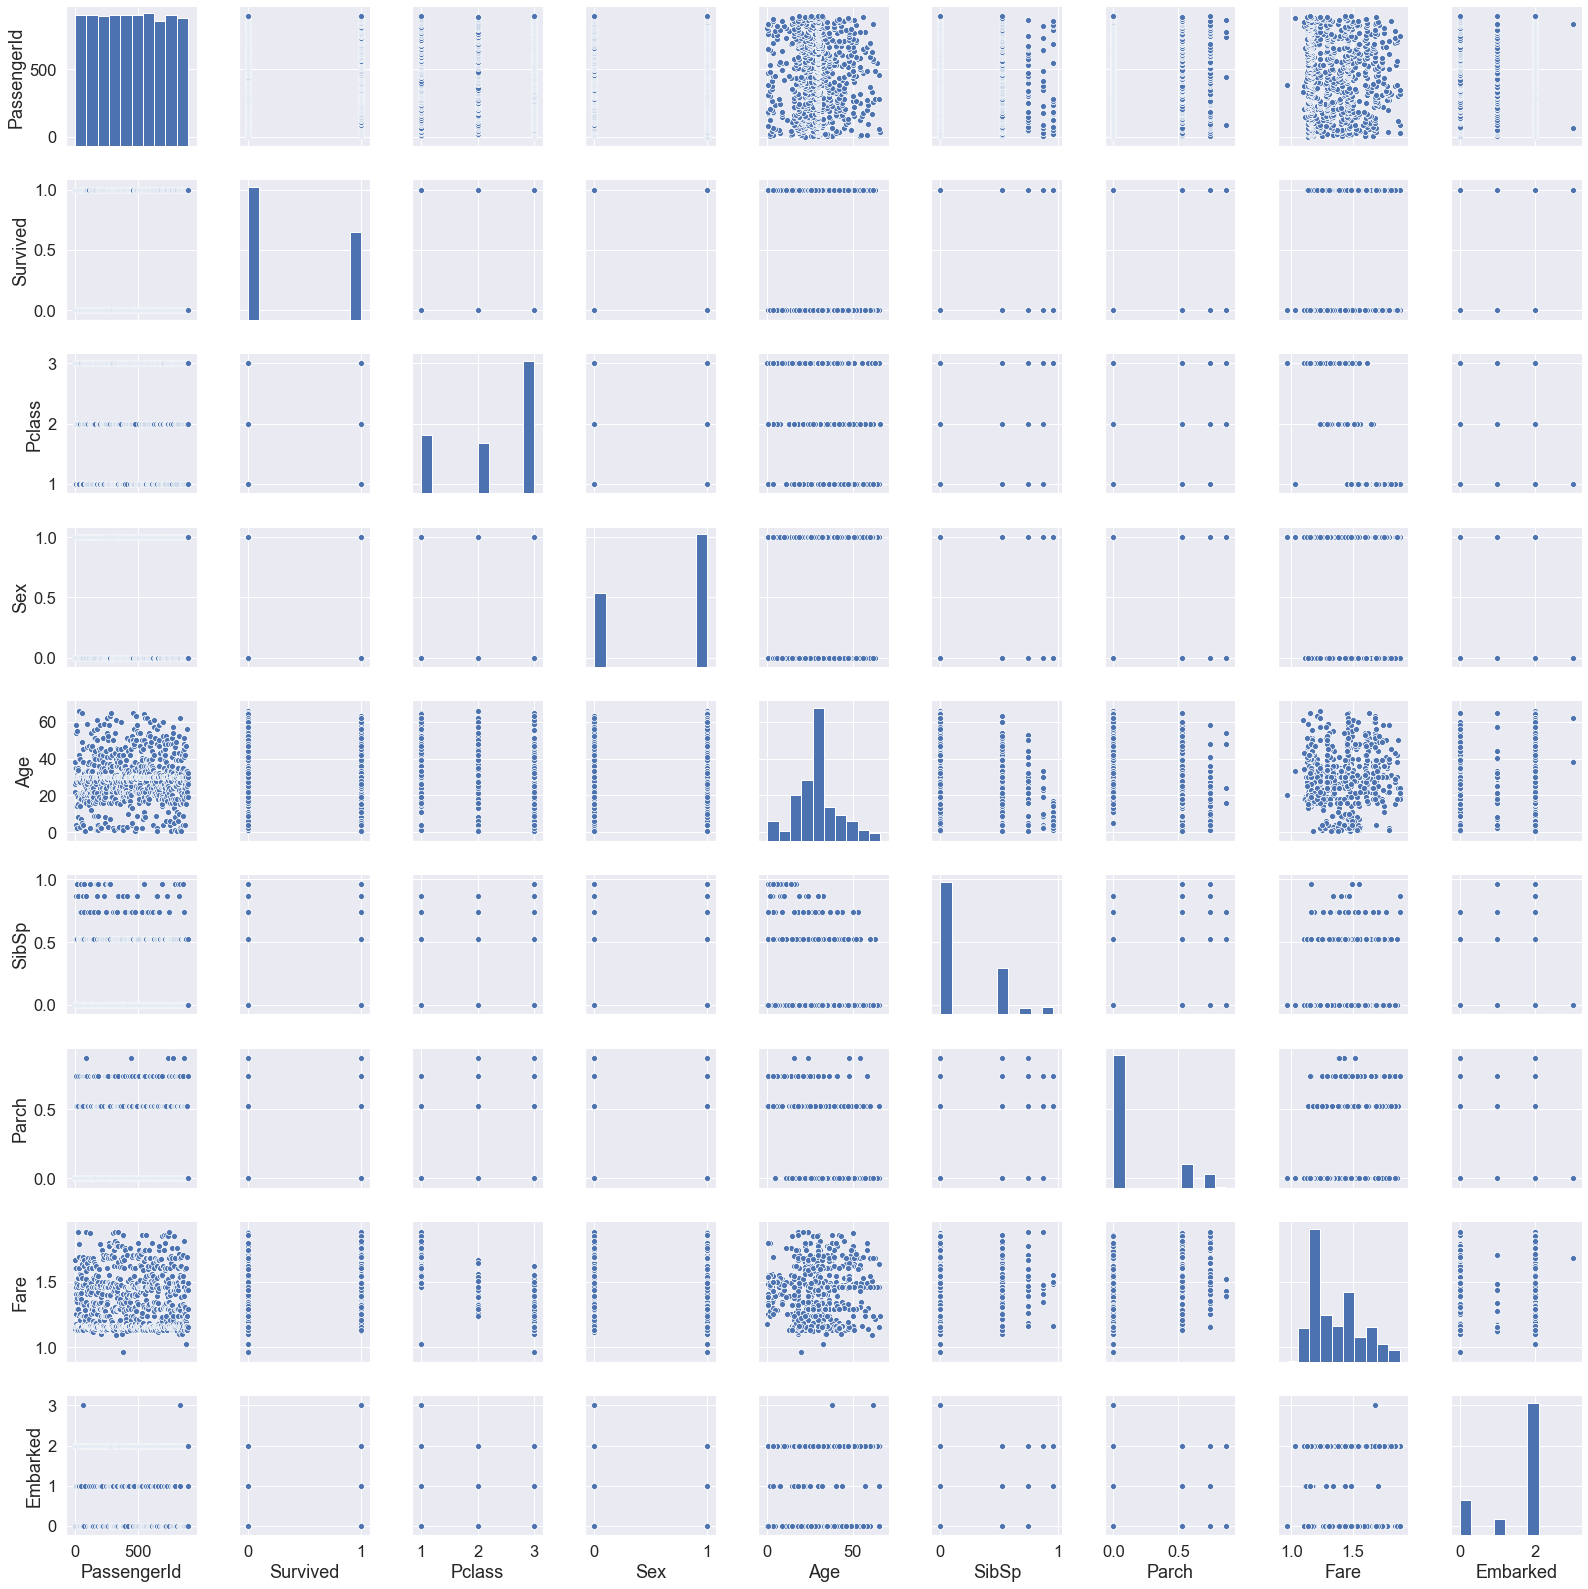

In [86]:
sns.pairplot(df_titanic)

(9.0, 0.0)

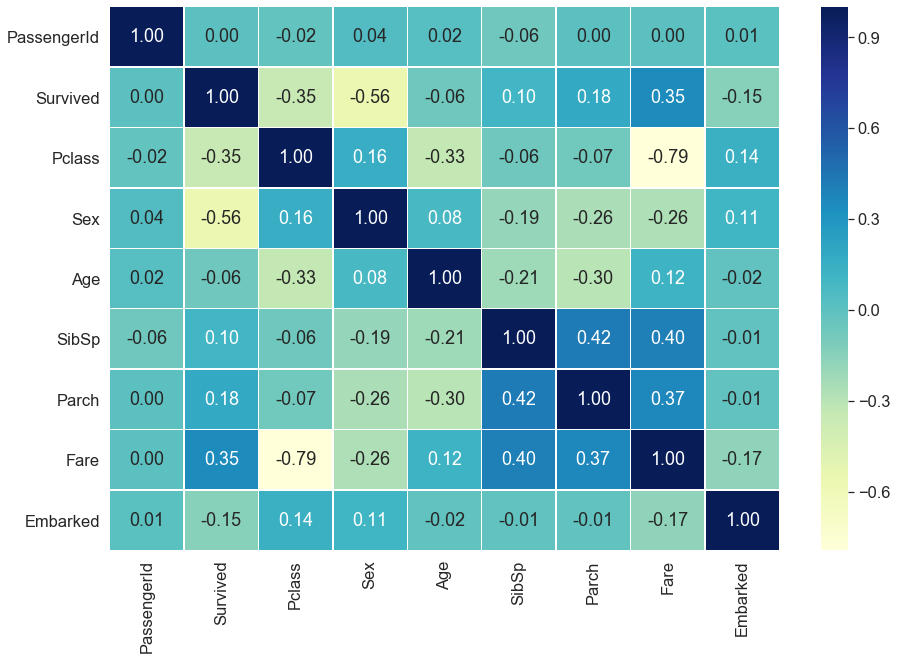

In [87]:
corr_matrix = df_titanic.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [88]:
y=df_titanic['Survived']

In [89]:
x=df_titanic.drop('Survived',axis=1)
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,3.0,1.0,22.000000,0.526589,0.000000,1.134691,2.0
1,2.0,1.0,0.0,38.000000,0.526589,0.000000,1.664038,0.0
2,3.0,3.0,0.0,26.000000,0.000000,0.000000,1.159662,2.0
3,4.0,1.0,0.0,35.000000,0.526589,0.000000,1.607603,2.0
4,5.0,3.0,1.0,35.000000,0.000000,0.000000,1.164014,2.0
...,...,...,...,...,...,...,...,...
886,887.0,2.0,1.0,27.000000,0.000000,0.000000,1.291725,2.0
887,888.0,1.0,0.0,19.000000,0.000000,0.000000,1.489299,2.0
888,889.0,3.0,0.0,29.699118,0.526589,0.741276,1.434282,2.0
889,890.0,1.0,1.0,26.000000,0.000000,0.000000,1.489299,0.0


In [90]:
x.shape

(844, 8)

In [91]:
y.shape

(844,)

In [92]:
df_titanic["Survived"].value_counts()

0.0    508
1.0    336
Name: Survived, dtype: int64

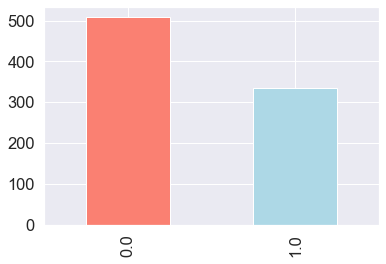

In [93]:
df_titanic["Survived"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [94]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x)

In [95]:
max_acc_score=0
for acc_state in range(42,100):      
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=acc_state,test_size=.20)
    rm=RandomForestClassifier(n_estimators=100)
    rm.fit(x_train,y_train)
    y_predrm=rm.predict(x_test)
    accuracy_score1=accuracy_score(y_test,y_predrm)
    if accuracy_score1 > max_acc_score:
        max_acc_score=accuracy_score1
        final_acc_state=acc_state
print('max acc score corresponding to',final_acc_state,'is:', max_acc_score)

max acc score corresponding to 85 is: 0.893491124260355


In [96]:
max_acc_score=0
for acc_state in range(42,100):      
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=acc_state,test_size=.22)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    y_predlg=lg.predict(x_test)
    accuracy_score1=accuracy_score(y_test,y_predlg)
    if accuracy_score1 > max_acc_score:
        max_acc_score=accuracy_score1
        final_acc_state=acc_state
print('max acc score corresponding to',final_acc_state,'is:', max_acc_score)

max acc score corresponding to 45 is: 0.8548387096774194


In [97]:
max_acc_score=0
for acc_state in range(42,100):      
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=acc_state,test_size=.22)
    knn=KNeighborsClassifier()
    knn.fit(x_train,y_train)
    y_predknn=knn.predict(x_test)
    accuracy_score1=accuracy_score(y_test,y_predknn)
    if accuracy_score1 > max_acc_score:
        max_acc_score=accuracy_score1
        final_acc_state=acc_state
print('max acc score corresponding to',final_acc_state,'is:', max_acc_score)

max acc score corresponding to 56 is: 0.8709677419354839


In [98]:
max_acc_score=0
for acc_state in range(42,100):      
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=acc_state,test_size=.22)
    svc=SVC()
    svc.fit(x_train,y_train)
    y_predsvc=svc.predict(x_test)
    accuracy_score1=accuracy_score(y_test,y_predsvc)
    if accuracy_score1 > max_acc_score:
        max_acc_score=accuracy_score1
        final_acc_state=acc_state
print('max acc score corresponding to',final_acc_state,'is:', max_acc_score)

max acc score corresponding to 56 is: 0.8709677419354839


In [99]:
max_acc_score=0
for acc_state in range(42,100):      
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=acc_state,test_size=.22)
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    y_preddtc=dtc.predict(x_test)
    accuracy_score1=accuracy_score(y_test,y_preddtc)
    if accuracy_score1 > max_acc_score:
        max_acc_score=accuracy_score1
        final_acc_state=acc_state
print('max acc score corresponding to',final_acc_state,'is:', max_acc_score)

max acc score corresponding to 86 is: 0.8225806451612904


In [100]:
from sklearn.naive_bayes import GaussianNB

models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "GaussianNB":GaussianNB(),
          "SVC":SVC(),
          "DecisionTreeClassifier":DecisionTreeClassifier(),
         }

# Create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    
    # Set random seed
    np.random.seed(45)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [101]:

model_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores


{'Logistic Regression': 0.7903225806451613,
 'KNN': 0.7956989247311828,
 'Random Forest': 0.7903225806451613,
 'GaussianNB': 0.7526881720430108,
 'SVC': 0.8064516129032258,
 'DecisionTreeClassifier': 0.7580645161290323}

In [102]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
models = {"Random Forest": RandomForestClassifier(n_estimators=100),
          "Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "GaussianNB":GaussianNB(),
          "SVC":SVC(),
          "DecisionTreeClassifier":DecisionTreeClassifier(),
          "GradientBoostingClassifier":GradientBoostingClassifier()
         }
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=85,test_size=.20)

# Create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Make a dictionary to keep model scores
    model_acc_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        y_pred1=model.predict(x_test)
        # Evaluate the model and append its score to model_scores
        model_acc_scores[name] = accuracy_score(y_test,y_pred1)

    return model_acc_scores

In [103]:
model_acc_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test,
                             )

model_acc_scores


{'Random Forest': 0.8875739644970414,
 'Logistic Regression': 0.7988165680473372,
 'KNN': 0.8579881656804734,
 'GaussianNB': 0.7869822485207101,
 'SVC': 0.8461538461538461,
 'DecisionTreeClassifier': 0.7692307692307693,
 'GradientBoostingClassifier': 0.8402366863905325}

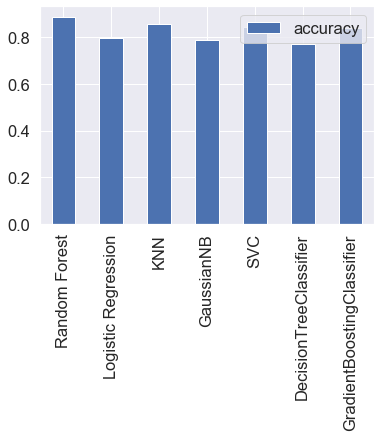

In [104]:
model_compare = pd.DataFrame(model_acc_scores, index=["accuracy"])
model_compare.T.plot.bar()

In [105]:
kernellist=['linear','poly','rbf']
for i in kernellist:
    svc=SVC(kernel=i)
    svc.fit(x_train,y_train)
    svc.score(x_train,y_train)
    predsvc=svc.predict(x_test)
    print(accuracy_score(y_test,predsvc))
    print(confusion_matrix(y_test,predsvc))
    print(classification_report(y_test,predsvc))

0.8106508875739645
[[98 15]
 [17 39]]
              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86       113
         1.0       0.72      0.70      0.71        56

    accuracy                           0.81       169
   macro avg       0.79      0.78      0.78       169
weighted avg       0.81      0.81      0.81       169

0.8579881656804734
[[104   9]
 [ 15  41]]
              precision    recall  f1-score   support

         0.0       0.87      0.92      0.90       113
         1.0       0.82      0.73      0.77        56

    accuracy                           0.86       169
   macro avg       0.85      0.83      0.84       169
weighted avg       0.86      0.86      0.86       169

0.8461538461538461
[[103  10]
 [ 16  40]]
              precision    recall  f1-score   support

         0.0       0.87      0.91      0.89       113
         1.0       0.80      0.71      0.75        56

    accuracy                           0.85       169
   mac

In [106]:
def dectree(cr,rs):
    dt_gini=DecisionTreeClassifier(criterion=cr,random_state=rs)
    dt_gini.fit(x_train,y_train)
    dt_gini.score(x_train,y_train)
    preddt=dt_gini.predict(x_test)
    print(accuracy_score(y_test,preddt))


In [107]:
dectree('gini',85)

0.7633136094674556


In [108]:
dectree('entropy',85)

0.8165680473372781


In [109]:
def get_cv_scores(model):
    scores = cross_val_score(model,
                             x_train,
                             y_train,
                             cv=5,
                             scoring='accuracy')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [110]:
rf=RandomForestClassifier(n_estimators=100,random_state=85)
rf.fit(x_train,y_train)
get_cv_scores(rf)

CV Mean:  0.797037037037037
STD:  0.021263259399121947




In [111]:
svc=SVC()
svc.fit(x_train,y_train)
get_cv_scores(svc)

CV Mean:  0.8103703703703704
STD:  0.019087553669222383




In [112]:
svc=DecisionTreeClassifier(criterion='gini',random_state=85)
svc.fit(x_train,y_train)
get_cv_scores(svc)

CV Mean:  0.7466666666666667
STD:  0.036106837353937604




In [113]:
from sklearn.model_selection import GridSearchCV
grid_2 = {'n_estimators': [1200, 1500, 2000],
          'max_depth': [None, 5, 10],
          'max_features': ['auto', 'sqrt'],
          'min_samples_split': [4, 6],
          'min_samples_leaf': [1, 2]}
# Split into train and test sets
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=85,test_size=.20)

# Set n_jobs to -1 to use all cores (NOTE: n_jobs=-1 is broken as of 8 Dec 2019, using n_jobs=1 works)
clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2,
                      cv=5, # 5-fold cross-validation
                      verbose=2) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clf.fit(x_train, y_train);

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   0.9s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   0.9s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   0.9s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   0.9s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   0.9s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1500 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1500, total=   1.5s
[CV] max_depth=None, max_

[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000, total=   1.4s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000, total=   1.4s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000, total=   1.4s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000, total=   1.4s
[CV] max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000, total=   1.4s
[CV] max_depth=None, max_

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200, total=   0.8s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500, total=   1.1s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500, total=   1.1s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500, total=   1.1s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500, total=   1.1s
[CV] max_depth=None, max_

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000, total=   1.4s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000, total=   1.4s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   0.7s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   0.7s
[CV] max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   0.8s
[CV] max_depth=5, max_features=auto, min_sa

[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, total=   1.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, total=   1.0s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000, total=   1.2s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000, total=   1.3s
[CV] max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000 
[CV]  max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000, total=   1.3s
[CV] max_depth=5, max_features=auto, min_samples_lea

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200, total=   0.8s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200, total=   0.8s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500, total=   1.0s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500, total=   1.0s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500, total=   0.9s
[CV] max_depth=5, max_features=sqrt, min_samples_lea

[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000, total=   1.2s
[CV] max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000 
[CV]  max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000, total=   1.2s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   0.9s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   0.9s
[CV] max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, total=   0.9s
[CV] max_depth=10, max_features=auto, min_samp

[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, total=   1.0s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, total=   1.1s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, total=   1.0s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000, total=   1.4s
[CV] max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000 
[CV]  max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=2000, total=   1.4s
[CV] max_depth=10, max_features=auto, min_s

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200, total=   0.9s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200, total=   0.9s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200, total=   0.8s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200, total=   0.9s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500, total=   1.1s
[CV] max_depth=10, max_features=sqrt, min_s

[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000, total=   1.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000, total=   1.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000, total=   1.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000, total=   1.4s
[CV] max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000 
[CV]  max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=2000, total=   1.4s


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  6.4min finished


In [114]:
gs_clf.best_params_


{'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 1200}

In [115]:
def evaluate_preds(y_test, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.
    """
    accuracy = accuracy_score(y_test, y_preds)
    precision = precision_score(y_test, y_preds)
    recall = recall_score(y_test, y_preds)
    f1 = f1_score(y_test, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict
# Max predictions with the GridSearchCV classifier
gs_y_preds = gs_clf.predict(x_test)

# Evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 87.57%
Precision: 0.87
Recall: 0.73
F1 score: 0.80


In [116]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=85,test_size=.20)
rf=RandomForestClassifier(n_estimators=2000,criterion='entropy')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
rfpred=rf.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,rfpred))
print('Confusion Matrix:',confusion_matrix(y_test,rfpred))
print('Classification Report:',classification_report(y_test,rfpred))

Accuracy Score: 0.8994082840236687
Confusion Matrix: [[107   6]
 [ 11  45]]
Classification Report:               precision    recall  f1-score   support

         0.0       0.91      0.95      0.93       113
         1.0       0.88      0.80      0.84        56

    accuracy                           0.90       169
   macro avg       0.89      0.88      0.88       169
weighted avg       0.90      0.90      0.90       169



In [117]:
from sklearn.ensemble import AdaBoostClassifier
rf=RandomForestClassifier(n_estimators=2000,criterion='entropy')
ad = AdaBoostClassifier(n_estimators=100, base_estimator=rf)
ad.fit(x, y)
ad.score(x_train,y_train)
adpred=ad.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,adpred))
print('Confusion Matrix:',confusion_matrix(y_test,adpred))
print('Classification Report:',classification_report(y_test,adpred))


Accuracy Score: 1.0
Confusion Matrix: [[113   0]
 [  0  56]]
Classification Report:               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       113
         1.0       1.00      1.00      1.00        56

    accuracy                           1.00       169
   macro avg       1.00      1.00      1.00       169
weighted avg       1.00      1.00      1.00       169



In [118]:
y_test

361    0.0
374    0.0
87     0.0
453    1.0
767    0.0
      ... 
877    0.0
519    0.0
171    0.0
521    0.0
232    0.0
Name: Survived, Length: 169, dtype: float64

In [119]:
adpred

array([0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

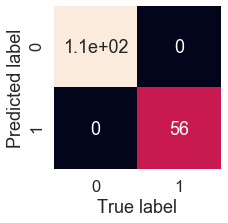

In [120]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, adpred):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, adpred),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, adpred)

In [121]:
print(confusion_matrix(y_test, adpred))

[[113   0]
 [  0  56]]


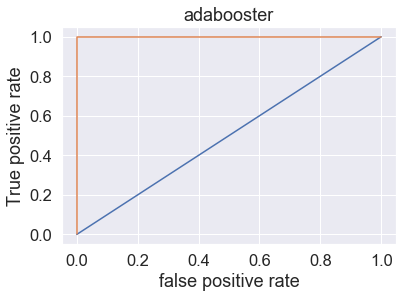

In [127]:
# Make predictions with probabilities
y_probs = ad.predict_proba(x_test)

# Keep the probabilites of the positive class only
y_probs = y_probs[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Check the false positive rate
fpr
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr,label='adabooster')
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title('adabooster')
plt.show()

In [123]:
pd.crosstab(df_titanic["Sex"], df_titanic["Survived"])

Survived,0.0,1.0
Sex,,
0.0,71,231
1.0,437,105


In [124]:
adaprediction = evaluate_preds(y_test, adpred)
adaprediction

Acc: 100.00%
Precision: 1.00
Recall: 1.00
F1 score: 1.00


{'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0}

In [125]:
from sklearn.externals import joblib
joblib.dump(ad,'titanic_pred.pkl')

['titanic_pred.pkl']

In [126]:
ada_from_joblib=joblib.load('titanic_pred.pkl')
joblib_y_preds = ada_from_joblib.predict(x_test)
evaluate_preds(y_test, joblib_y_preds)


Acc: 100.00%
Precision: 1.00
Recall: 1.00
F1 score: 1.00


{'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1': 1.0}